# **<font color='FF5733'>Project 2 - Canny Edge Detection - Live coding**<br></font>

###Three main parts:

1) Find the derivatives, compute magnitude and orientation of the gradient

2) Perform non-maximum supression

3) Tuning high and low edge thresholds to perform edge linking


---






###<font color='FF5733'>Non-maximum suppression review<br></font>



*   First find the magnitude and orientation of the gradient
*   For a pixel *x*, check the magnitude of the pixels on both side of its gradient orientation. If pixel *x* is not the maximum then we suppress it.





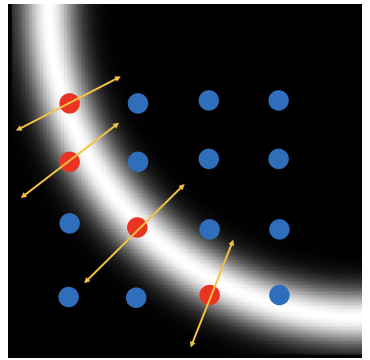


###<font color='FF5733'>Edge Linking/Hysteresis review<br></font>



*   The process of filling in full edges when parts of edge might be faint and undetected
*   Rather than walking along the gradient we now walk pendicular to the gradient, which is the length of the edge. Once we’re on the edge we can perform hysteresis using a high and low threshold map and link any disconnected edges.

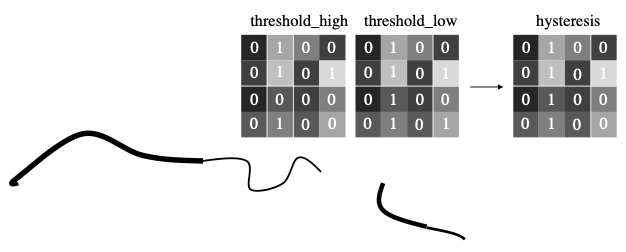

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Please use `cd` command to change the directory to the folder containing this notebook file.

In [ ]:
cd /content/drive/MyDrive/CIS5810/week2/CIS_5810_Project_2_Canny_Edge_Student_Files_V2

/content/drive/MyDrive/CIS5810/week2/CIS_5810_Project_2_Canny_Edge_Student_Files_V2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy import signal
from PIL import Image
import argparse

# TODO: Copy the path of the folder that contains this notebook using the file navigation on the left:
# Ex. /content/drive/MyDrive/CIS5810/Project_2_Canny_Edge
sys.path.append('/content/drive/MyDrive/CIS5810/week2/CIS_5810_Project_2_Canny_Edge_Student_Files_V2')

# import functions
from helpers import *



###<font color='FF5733'>Hints for findDerivatives:<br></font>

*   Build the filters as numpy arrays e.g. np.array([[1,2,3],[4,5,6]])

    Recommended array-related python documents:

    https://numpy.org/doc/stable/reference/routines.array-creation.html
    
    https://numpy.org/doc/stable/reference/routines.array-manipulation.html


*   Read the scipy.signal documentation for help when convolving (mentioned in last week's recitation)
*   Check https://numpy.org/doc/stable/reference/routines.math.html when computing Ori
     


In [ ]:
a = np.array([[1, 0, -1]])
b = np.arange(0,9).reshape(3,3)
print(b)
b = signal.convolve(b, a, 'same')
b = signal.convolve2d()
print(b)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 1  2 -1]
 [ 4  2 -4]
 [ 7  2 -7]]


In [ ]:
def findDerivatives(I_gray):
    '''
    File clarification:
        Compute gradient information of the input grayscale image
        - Input I_gray: H x W matrix as image
        - Output Mag: H x W matrix represents the magnitude of derivatives
        - Output Magx: H x W matrix represents the magnitude of derivatives along x-axis
        - Output Magy: H x W matrix represents the magnitude of derivatives along y-axis
        - Output Ori: H x W matrix represents the orientation of derivatives
'''
    #Filter defintions

    G = #Gaussian kernel using np.array()
    dx = #derivative in x
    dy = #derivative in y

    #Convolution of Gaussian with derivatives

    Gx = #G convolved with dx
    Gy = #G convolved with dy

    #Convolution of image with Gx and Gy (image gradient in x direciton and y direciton, respectively)

    Magx =
    Magy =

    #gradient magnitude

    Mag = f(Magx, Magy)

    #gradient orientation
      #hint: see week 2 slide for how to compute the ori

    Ori = g(Magx, Magy)

    return Mag, Magx, Magy, Ori

SyntaxError: ignored

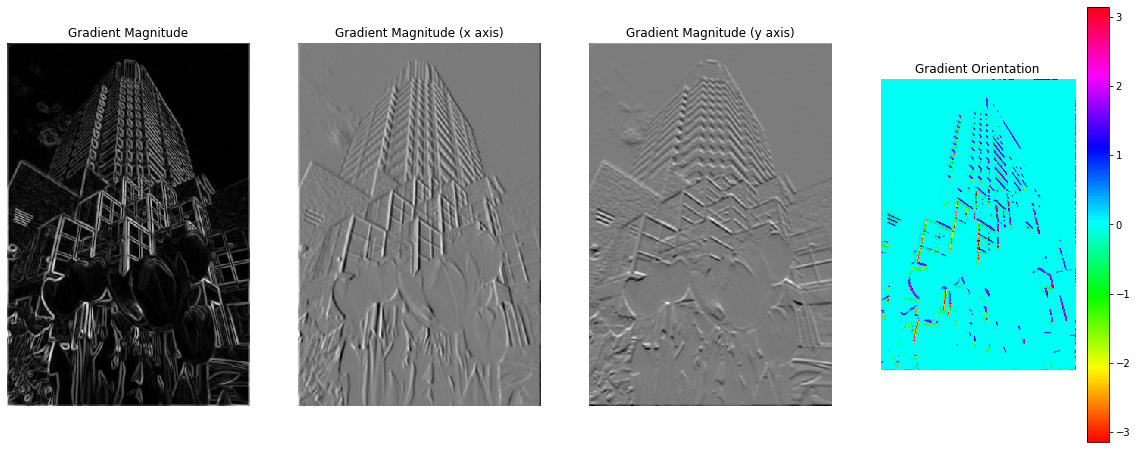


###<font color='FF5733'>Hints for nonMaxSup:<br></font>

*   Consider using meshgrid to simplify finding neighbors
*   Find the direction in which neigbors are located using np.sin and np.cos
>*For example, if ori = 30 then sin(ori) = 0.5, cos(ori) = 0.866*
*   What is interp2? A helper function that returns a matrix where every pixel has been replaced with its neighbor or an approximation of the neighbor (where neighbor is determined by the x and y of the pixel in the orientation-direction)
>*For example, If the pixel of interest is (0,0) and the orientation direction is pointing 0 degrees then interp2 will return a matrix where the pixel of interest is replaced by the pixel that was in (1,0)*

  For more information: https://en.wikipedia.org/wiki/Bilinear_interpolation
*   We're ultimately returning a binary matrix i.e. True and False indicating max pixels (Note that the max pixel should have value no smaller than both of its neighbors along the gradient direction)




















In [ ]:
# For finding neighboring pixel value
mag = np.array([[1,2],[2,1]])
# after meshgrid x,y = np.meshgrid()
x, y = np.meshgrid(np.array([0,1]), np.array([0,1]))
#x = np.array([[0,1],[0,1]])
#y = np.array([[0,0],[1,1]])
print(mag)
print(x)
print(y)

[[1 2]
 [2 1]]
[[0 1]
 [0 1]]
[[0 0]
 [1 1]]


In [ ]:
# Interp2 extra example
mag = np.array([[1,10],[5,50]])
print(mag)

# get neighbor's coordinates
middle_x = np.array([0.5])
middle_y = np.array([0.5])
print(interp2(mag,middle_x,middle_y))


out_of_boundary_x = np.array([1.5])
out_of_boundary_y = np.array([0.5])
print(interp2(mag,out_of_boundary_x,out_of_boundary_y))

mag = np.pad(mag, 1)
print(mag)

[[ 1 10]
 [ 5 50]]
[16.5]
[30.]
[[ 0  0  0  0]
 [ 0  1 10  0]
 [ 0  5 50  0]
 [ 0  0  0  0]]


In [ ]:
# For replacing out-of-boundary value
x = np.arange(0,4).reshape(2,2)
print(x)
x_bool = x > 1
#x_bool = (x > 1) & (x < 3)
print(x_bool)
x[x_bool] = 0
print(x)

In [ ]:
def nonMaxSup(Mag, Ori):
    '''
    File clarification:
        Find local maximum edge pixel using NMS along the line of the gradient
        - Input Mag: H x W matrix represents the magnitude of derivatives
        - Input Ori: H x W matrix represents the orientation of derivatives
        - Output M: H x W binary matrix represents the edge map after non-maximum suppression
    '''

    # Meshgrid

    x, y = np.meshgrid( , ) # use np.arange()

    # getting neighbors' indices in the gradient direction

    x_neighbor = f(x)
    y_neighbor = g(y)

    # neigbors in the other gradient direction

    x_neighbor2 = f2(x)
    y_neighbor2 = g2(y)

    # using interpolation to get neighbor

    # zero-pad the Mag matrix manually
    neighbor1 = interp2(Mag, x_neighbor, y_neighbor)
    neighbor2 = interp2(Mag, x_neighbor2, y_neighbor2)

    # some steps to eliminate neighbor values that are out of boundary
    # could use np.logicalOr
    ...

    # perform NMS - pseudo code below

    #two approaches:

    #1 - loop
    for every pixel:
      if pixel >= neighbor1 and pixel>=neighbor2:
        True
      else:
        False

    #2 - Vectorized
    Mag >= neighbor1 & Mag >=neighbor2


    return M

#<font color='FF5733'>Intuition behind tuning: We want to be able to see the main body of the image. </font>



If the thresholds are too low then we will pick up on too much detail. If the threshold is too high then we will overlook faint edges.

For each individual image, think about how toggling the low and high thresholds can help detect edges both initially and through edge linking.

In [ ]:
# keep results for all images
image_folder = "Images"
save_folder = "Results"
# fill in the threshold (low, high) you have tuned in the cell above
thresh_dict = {'118035.jpg': (0, 0),
                '135069.jpg': (0, 0),
                '16068.jpg': (0, 0),
                '189080.jpg': (0, 0),
                '201080.jpg': (0, 0),
                '21077.jpg': (0, 0),
                '22013.jpg': (0, 0),
                '3096.jpg': (0, 0),
                '48017.jpg': (0, 0),
                '55067.jpg': (0, 0),
                '86000.jpg': (0, 0),
                'I1.jpg': (0, 0)}
# generate results one by one
for filename in os.listdir(image_folder):
    # read in image
    im_path = os.path.join(image_folder, filename)
    I = np.array(Image.open(im_path).convert('RGB'))
    low, high = thresh_dict[filename]
    E = cannyEdge(I, low, high)
    pil_image = Image.fromarray(E.astype(np.uint8) * 255).convert('L')
    pil_image.save(os.path.join(save_folder, "{}_Result.png".format(filename.split(".")[0])))

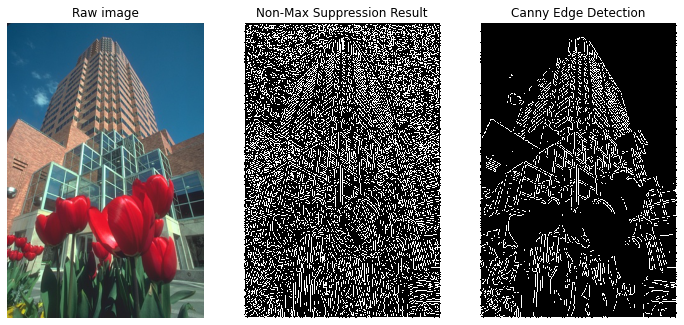